In [1]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)


print(pca.explained_variance_ratio_)




[0.99244289 0.00755711]


## Visualizing 4D data
### Idea 1

3D Plot with 4th dimension encoded as colour / point size / symbol.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
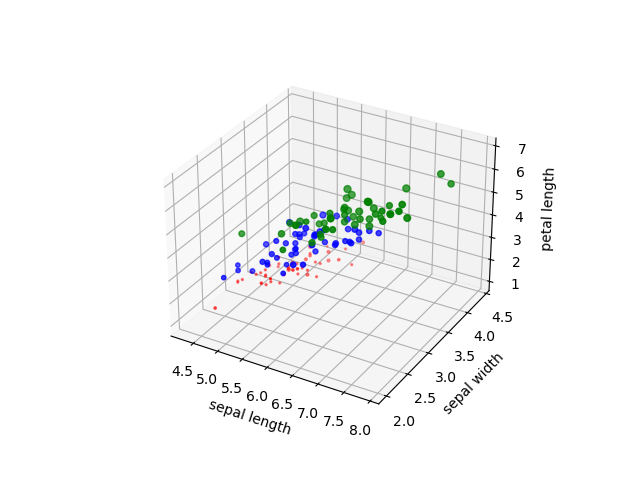

In [17]:
import pandas as pd
import seaborn as sns
%matplotlib widget
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['sepal length']
y = df['sepal width']
z = df['petal length']
s = df['petal width']
c = df['target']
print(c.unique())
colors = {'Iris-setosa':"red", 'Iris-versicolor':"blue", 'Iris-virginica':"green"}

ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
ax.set_zlabel("petal length")

ax.scatter(x, y, z, s = df['petal width']*10 , c=c.map(colors))

plt.show()


In [48]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [42]:
sns.scatterplot(data=df, x='sepal length', y='sepal width',hue ="target")

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

In [ ]:

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()